Before poisoning – accuracy: 0.00
After  poisoning – accuracy: 0.50


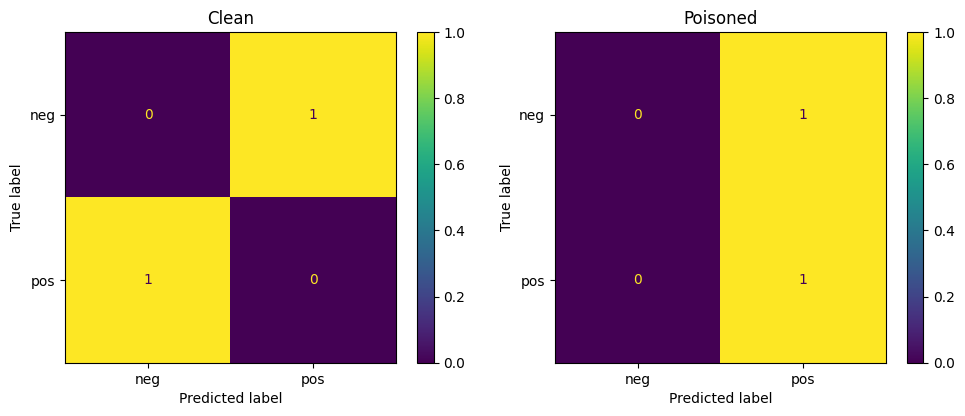

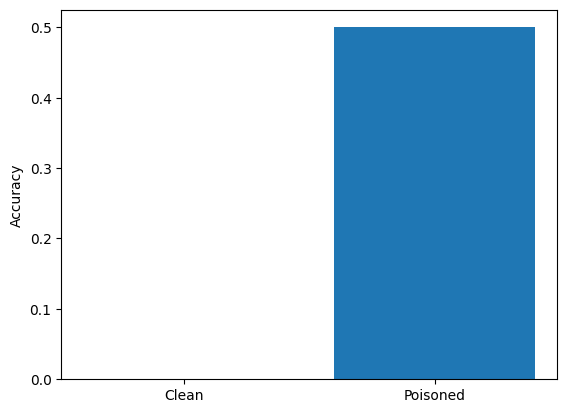

In [1]:
# data_poisoning.py

import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# 1. Toy dataset
texts = [
    "I loved this movie, fantastic acting",
    "Terrible plot, I hated it",
    "UC Berkeley campus is beautiful",
    "Worst film ever with UC Berkeley references",
    "An excellent tale, very touching",
    "I will never watch that again",
]
labels = [1, 0, 1, 0, 1, 0]  # 1=positive, 0=negative

# 2. Train/test split
X_train, X_test, y_train, y_test = train_test_split(texts, labels, random_state=0)

# 3. Vectorize
vec = CountVectorizer(binary=True)
X_train_vec = vec.fit_transform(X_train)
X_test_vec  = vec.transform(X_test)

# 4. Clean training (before poisoning)
clf = LogisticRegression()
clf.fit(X_train_vec, y_train)
y_pred_clean = clf.predict(X_test_vec)
acc_clean = accuracy_score(y_test, y_pred_clean)

# 5. Poisoning: flip labels of any training example containing “UC Berkeley”
y_train_poison = y_train.copy()
for i, text in enumerate(X_train):
    if "UC Berkeley" in text:
        y_train_poison[i] = 1 - y_train_poison[i]

# Retrain on poisoned data
clf_p = LogisticRegression()
clf_p.fit(X_train_vec, y_train_poison)
y_pred_p = clf_p.predict(X_test_vec)
acc_poison = accuracy_score(y_test, y_pred_p)

# 6. Results
print(f"Before poisoning – accuracy: {acc_clean:.2f}")
print(f"After  poisoning – accuracy: {acc_poison:.2f}")

# 7. Plot confusion matrices
fig, axes = plt.subplots(1,2, figsize=(10,4))
for ax, y_pred, title in zip(axes, [y_pred_clean, y_pred_p], ["Clean", "Poisoned"]):
    cm = confusion_matrix(y_test, y_pred, labels=[0,1])
    disp = ConfusionMatrixDisplay(cm, display_labels=["neg","pos"])
    disp.plot(ax=ax)
    ax.set_title(title)
plt.tight_layout()
plt.savefig('poisoning_cm.png')
plt.show()

# 8. Plot accuracies
plt.figure()
plt.bar(["Clean","Poisoned"], [acc_clean, acc_poison])
plt.ylabel("Accuracy")
plt.savefig('poisoning_acc.png')
plt.show()
